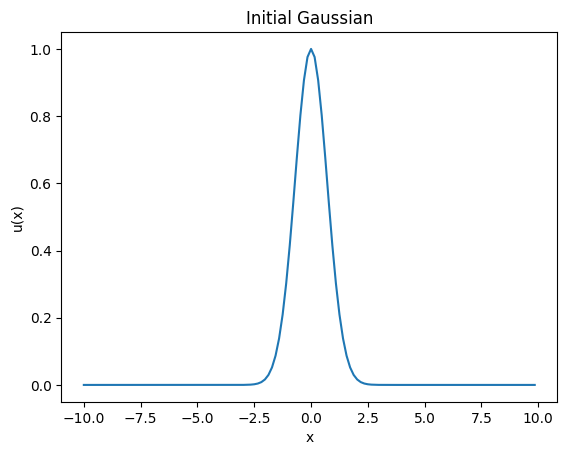

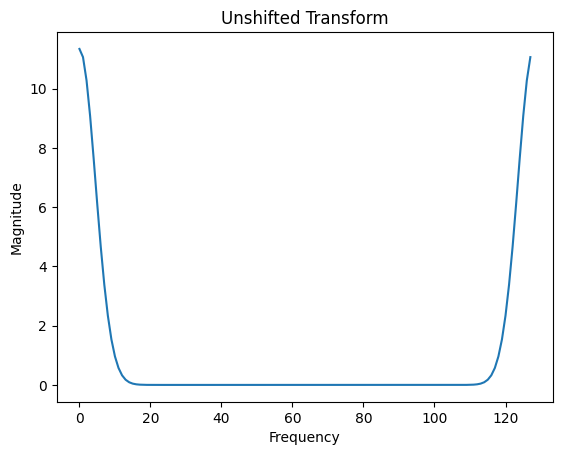

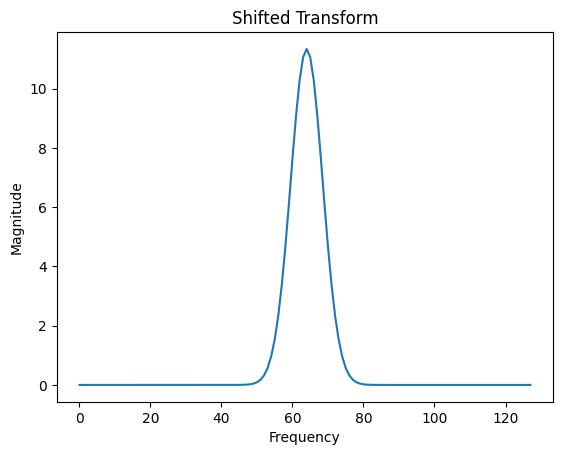

In [7]:
import numpy as np
import matplotlib.pyplot as plt

L = 20  # define the computational domain [-L/2,L/2]
n = 128  # define the number of Fourier modes 2^n
x2 = np.linspace(-L/2, L/2, n+1) # Define the domain
x = x2[:n] # Consider only the first n points

u = np.exp(-x * x)
ut = np.fft.fft(u)
utshift = np.fft.fftshift(ut)

# Plot initial gaussian
plt.figure(1)
plt.plot(x, u)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Initial Gaussian')

# Plot unshifted transform
plt.figure(2)
plt.plot(np.abs(ut))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Unshifted Transform')

# Plot shifted transform
plt.figure(3)
plt.plot(np.abs(utshift))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Shifted Transform')

plt.show()



/Users/nathankutz/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/nathankutz/anaconda3/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


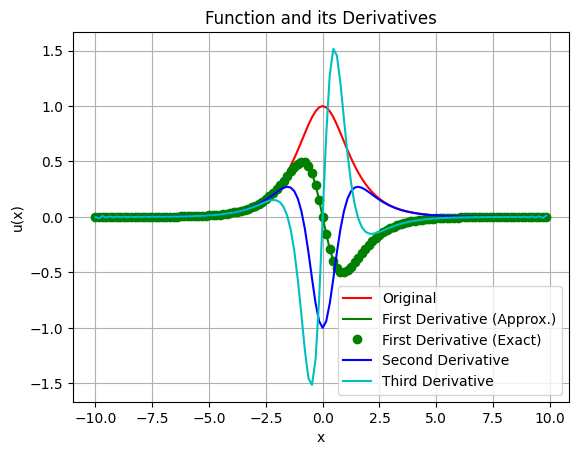

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def sech(x):
    return 1 / np.cosh(x)

def tanh(x):
    return np.sinh(x) / np.cosh(x)

L = 20  
n = 128  
x2 = np.linspace(-L/2, L/2, n+1)
x = x2[:n]

u = sech(x)
ut = np.fft.fft(u)

k = (2 * np.pi / L) * np.concatenate((np.arange(0, n//2), np.arange(-n//2, 0)))
ut1 = 1j * k * ut # first derivative
ut2 = -k**2 * ut # second derivative
ut3 = -1j * k**3 * ut  # third derivative

u1 = np.fft.ifft(ut1) # Inverse transform
u2 = np.fft.ifft(ut2)
u3 = np.fft.ifft(ut3)

# Analytic first derivative
u1exact = -sech(x) * tanh(x)

# Plot
plt.plot(x, u, 'r', label='Original')
plt.plot(x, u1, 'g', label='First Derivative (Approx.)')
plt.plot(x, u1exact, 'go', label='First Derivative (Exact)')
plt.plot(x, u2, 'b', label='Second Derivative')
plt.plot(x, u3, 'c', label='Third Derivative')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Function and its Derivatives')
plt.legend()
plt.grid(True)
plt.show()


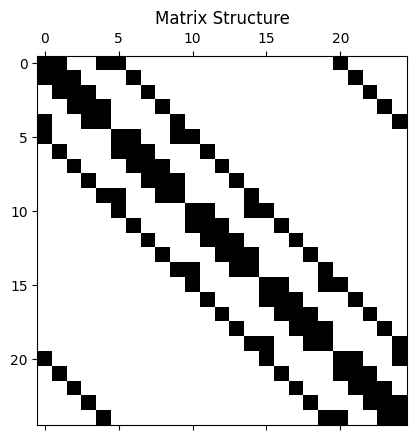

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

m = 5    # N value in x and y directions
n = m * m  # total size of matrix

e0 = np.zeros((n, 1))  # vector of zeros
e1 = np.ones((n, 1))   # vector of ones
e2 = np.copy(e1)    # copy the one vector
e4 = np.copy(e0)    # copy the zero vector

for j in range(1, m+1):
    e2[m*j-1] = 0  # overwrite every m^th value with zero
    e4[m*j-1] = 1  # overwirte every m^th value with one

# Shift to correct positions
e3 = np.zeros_like(e2)
e3[1:n] = e2[0:n-1]
e3[0] = e2[n-1]

e5 = np.zeros_like(e4)
e5[1:n] = e4[0:n-1]
e5[0] = e4[n-1]

# Place diagonal elements
diagonals = [e1.flatten(), e1.flatten(), e5.flatten(), 
             e2.flatten(), -4 * e1.flatten(), e3.flatten(), 
             e4.flatten(), e1.flatten(), e1.flatten()]
offsets = [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)]

matA = spdiags(diagonals, offsets, n, n).toarray()

# Plot matrix structure
plt.figure(5)
plt.spy(matA)
plt.title('Matrix Structure')
plt.show()
